In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('sales_data_with_discounts.csv')
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [4]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [5]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()


In [6]:
for col in numerical_columns:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    std_dev = df[col].std()
    print(f'{col}: Mean = {mean}, Median = {median}, Mode = {mode}, Std Dev = {std_dev}')

Volume: Mean = 5.066666666666666, Median = 4.0, Mode = 3, Std Dev = 4.231602391213927
Avg Price: Mean = 10453.433333333332, Median = 1450.0, Mode = 400, Std Dev = 18079.90483993645
Total Sales Value: Mean = 33812.83555555555, Median = 5700.0, Mode = 24300, Std Dev = 50535.07417255328
Discount Rate (%): Mean = 15.155241895330914, Median = 16.57776564929597, Mode = 5.007822189204133, Std Dev = 4.220602153325511
Discount Amount: Mean = 3346.499424342415, Median = 988.9337332382784, Mode = 69.17794228822787, Std Dev = 4509.9029633539985
Net Sales Value: Mean = 30466.336131270138, Median = 4677.788059301853, Mode = 326.97480055470817, Std Dev = 46358.656624066934


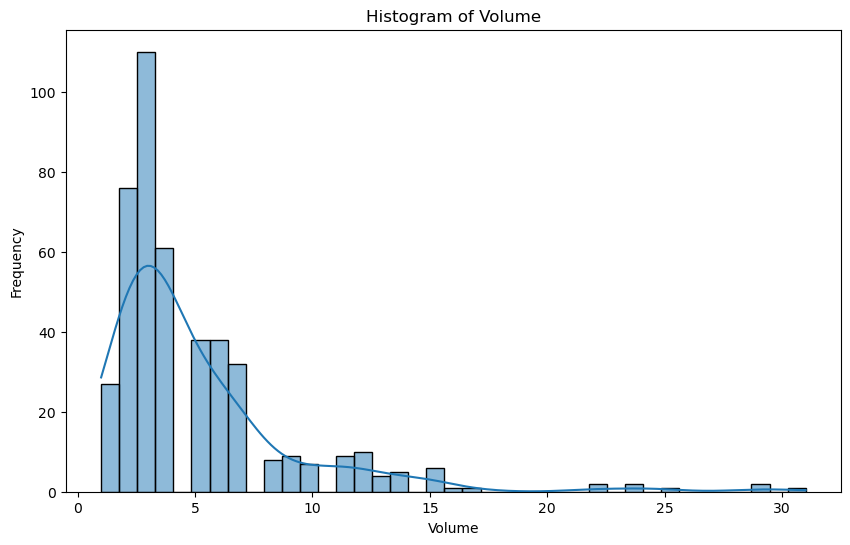

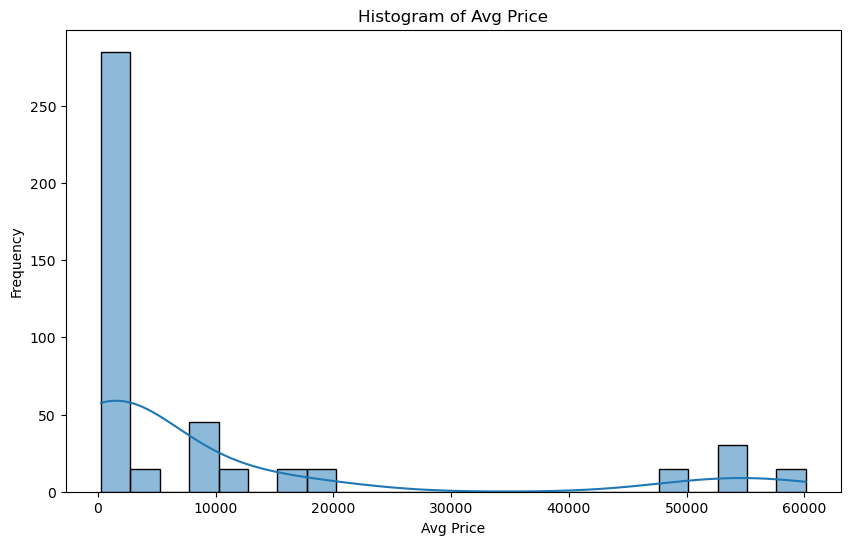

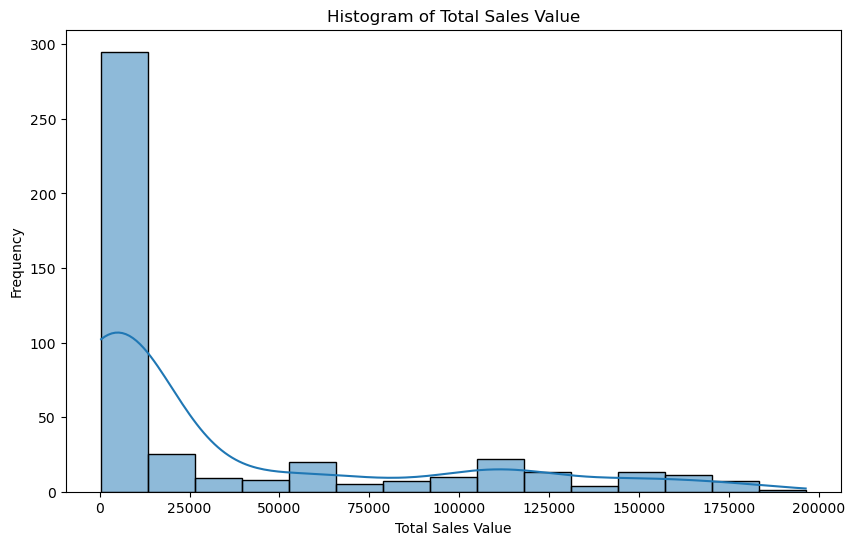

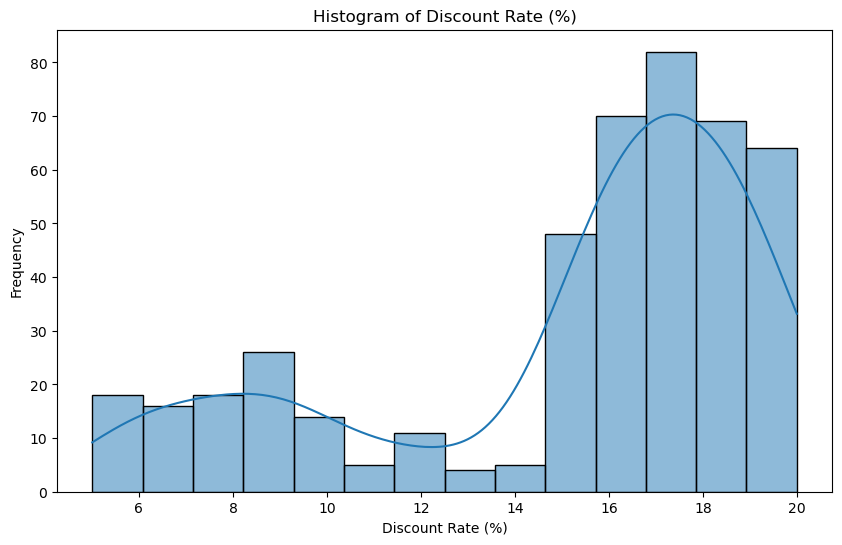

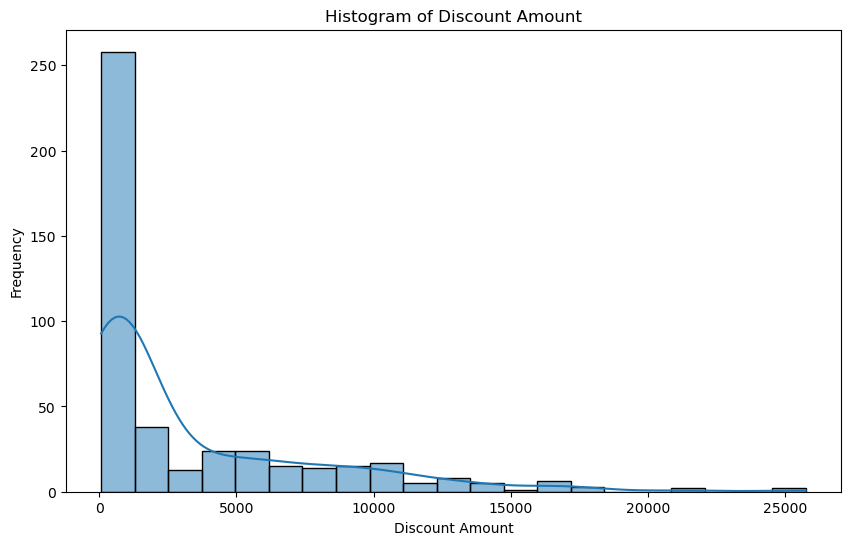

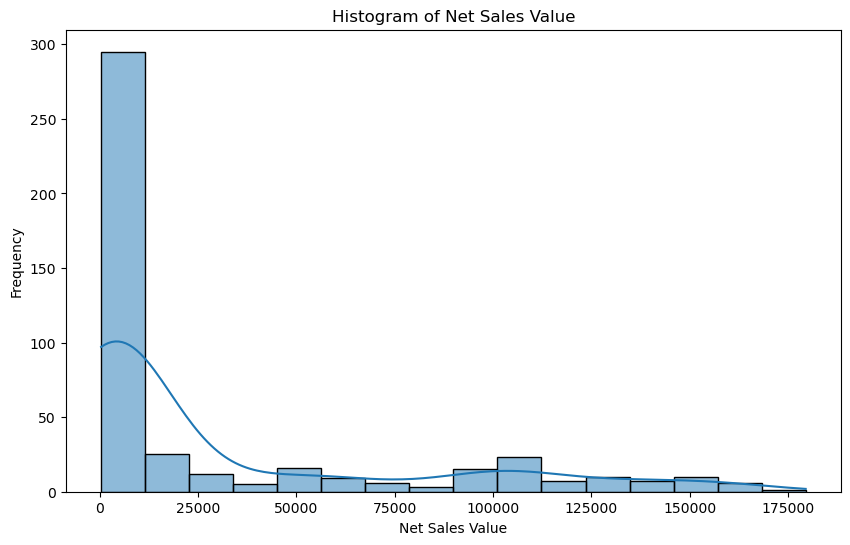

In [7]:
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

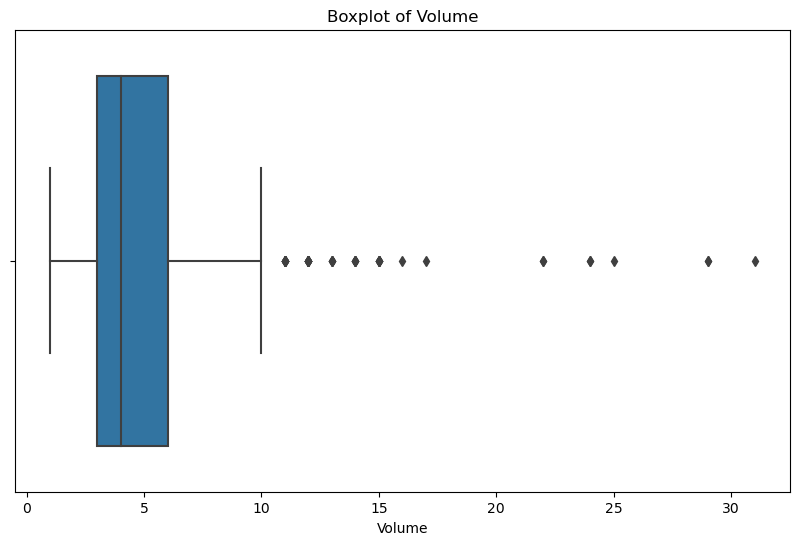

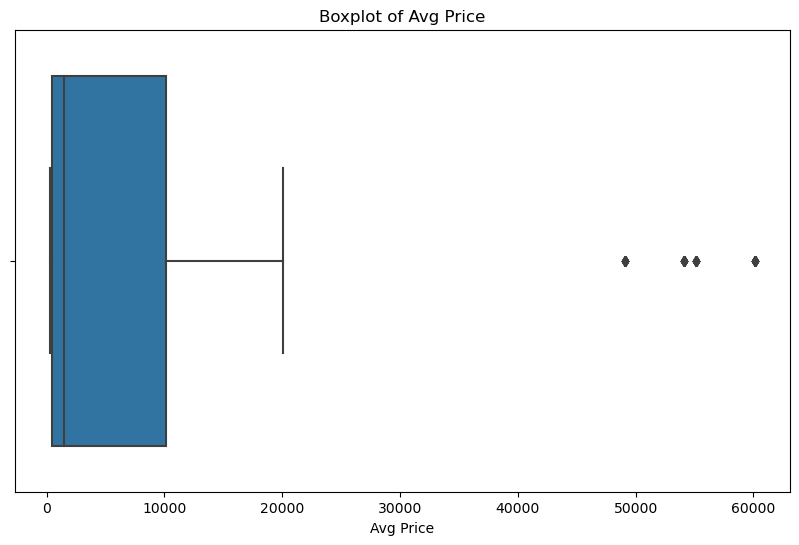

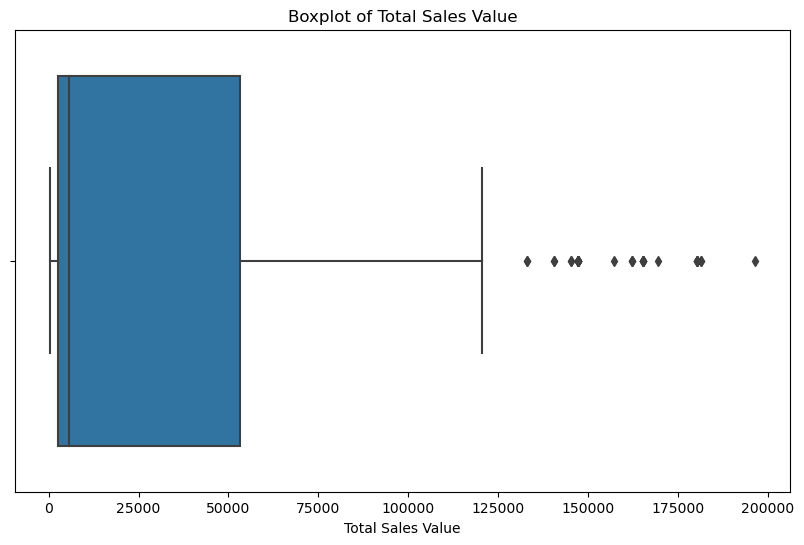

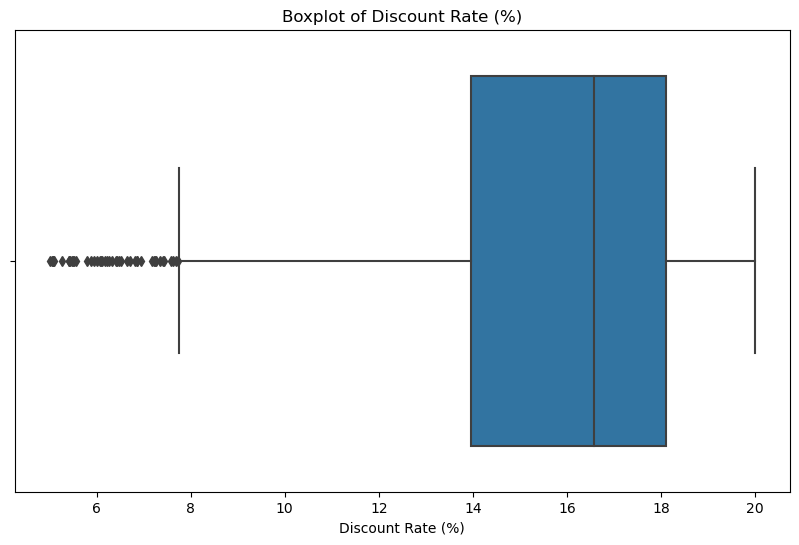

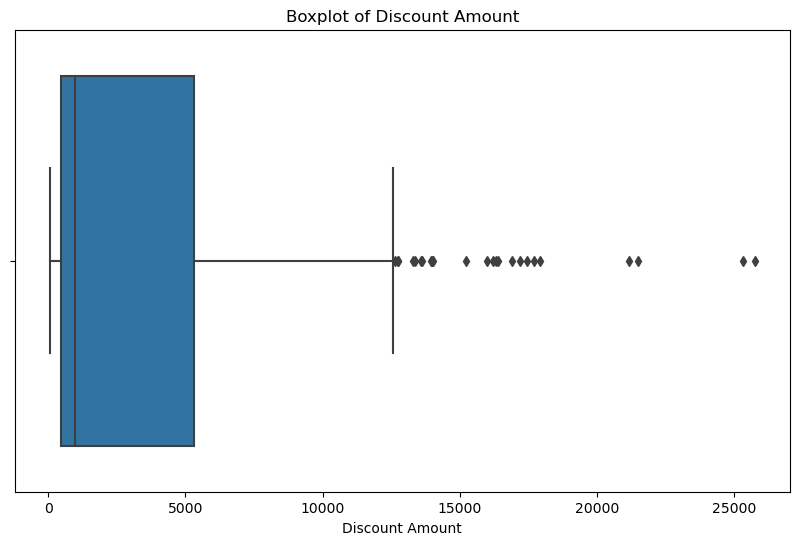

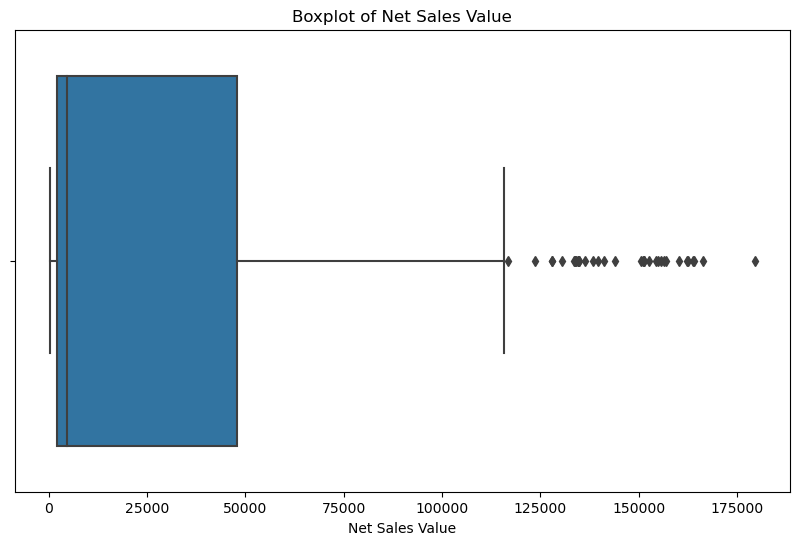

In [8]:
# Boxplots for Numerical Columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

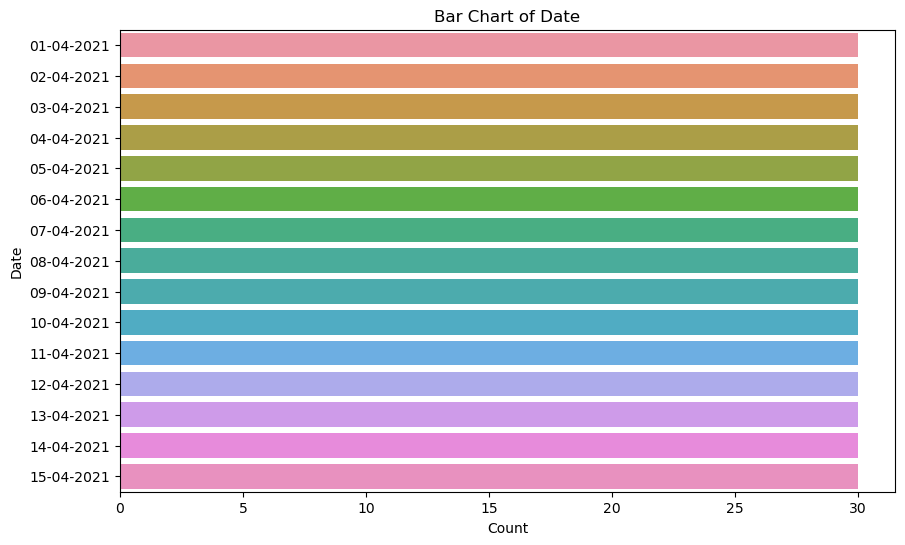

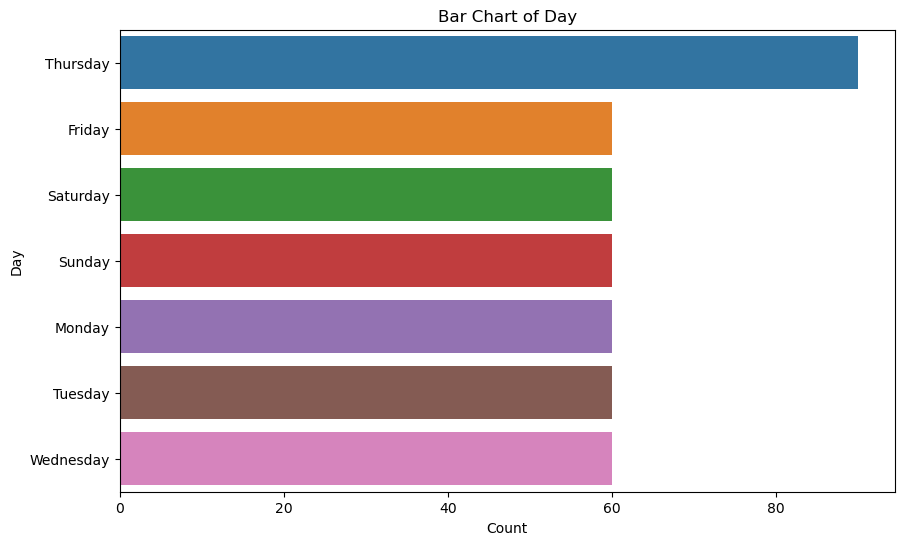

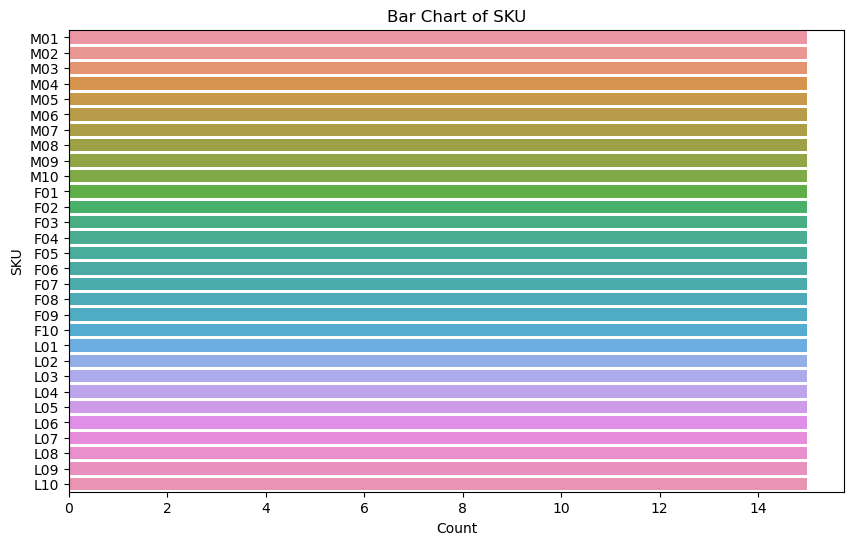

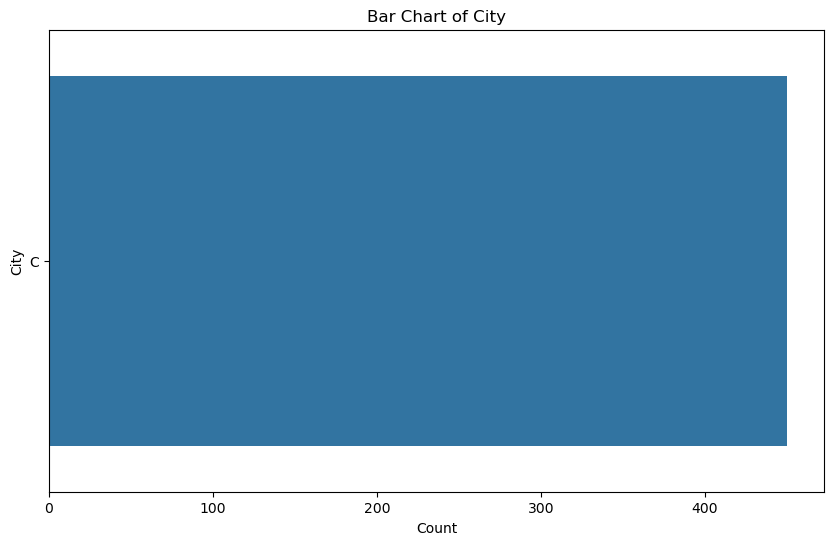

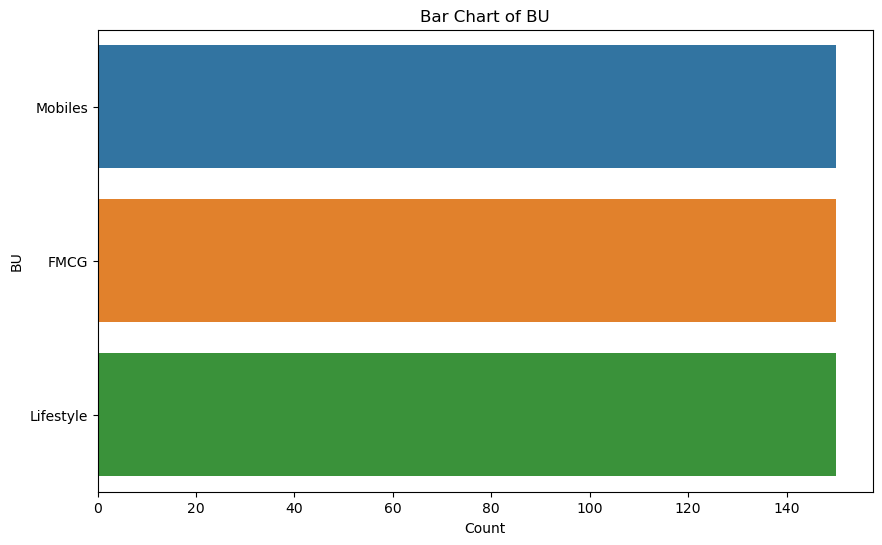

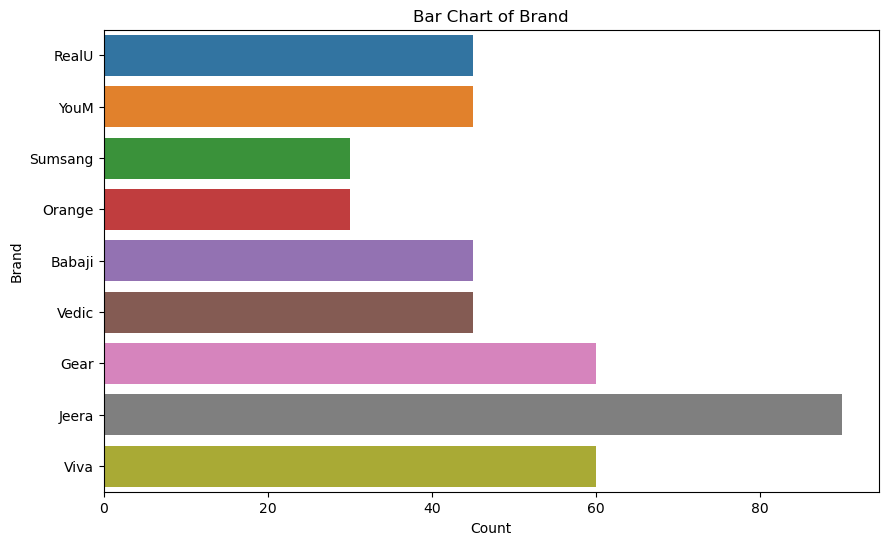

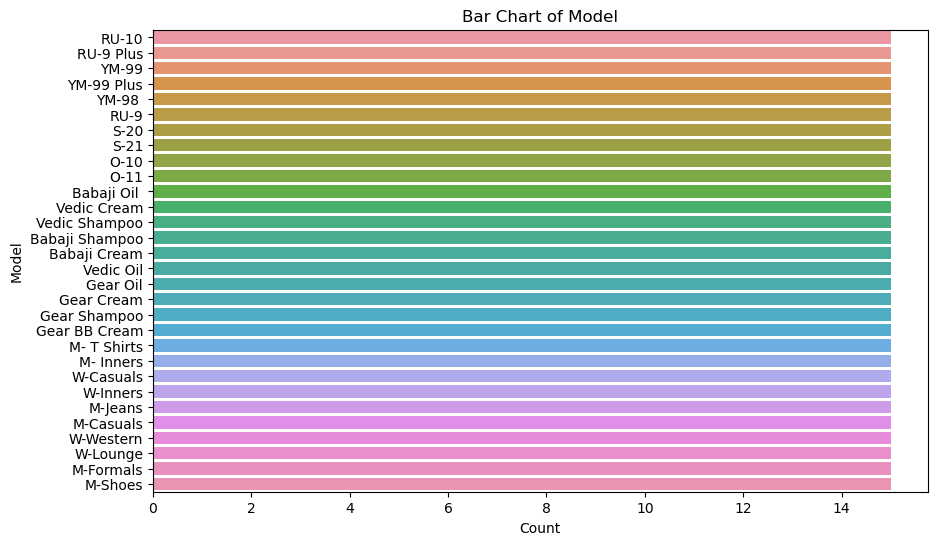

In [9]:
# Bar Charts for Categorical Columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col])
    plt.title(f'Bar Chart of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

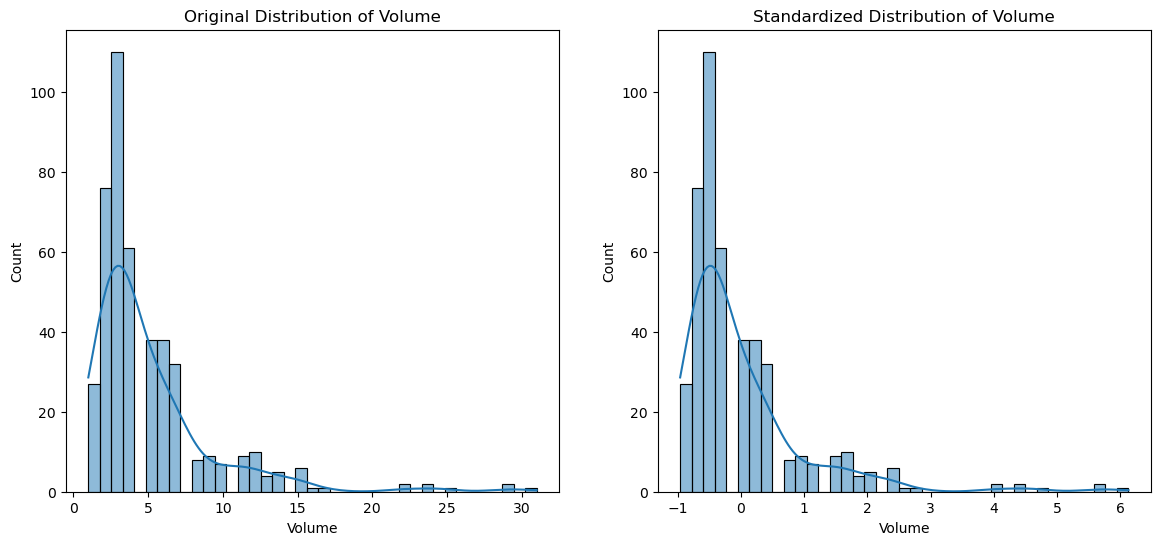

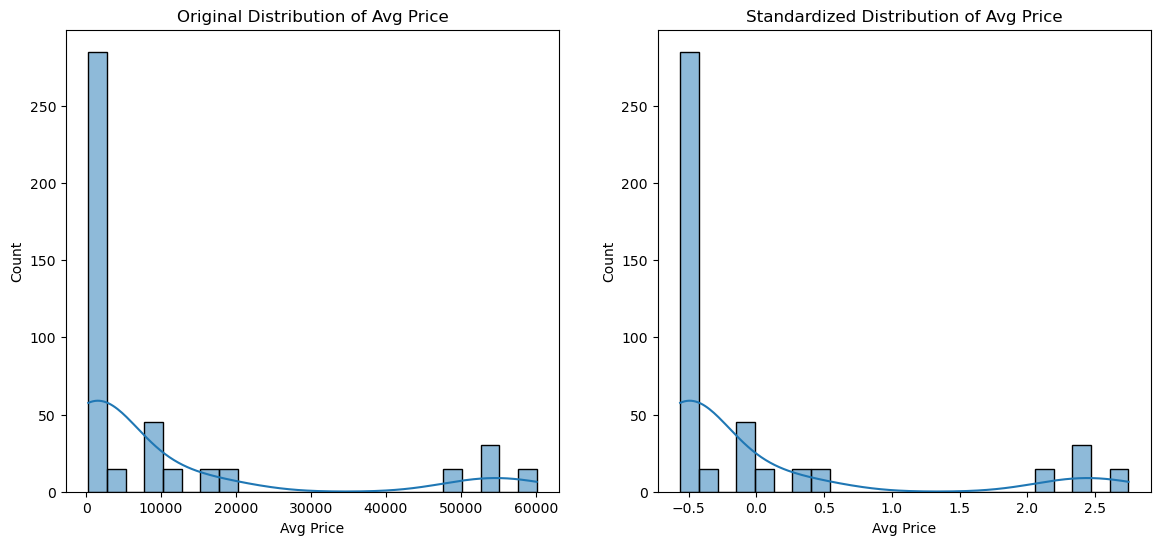

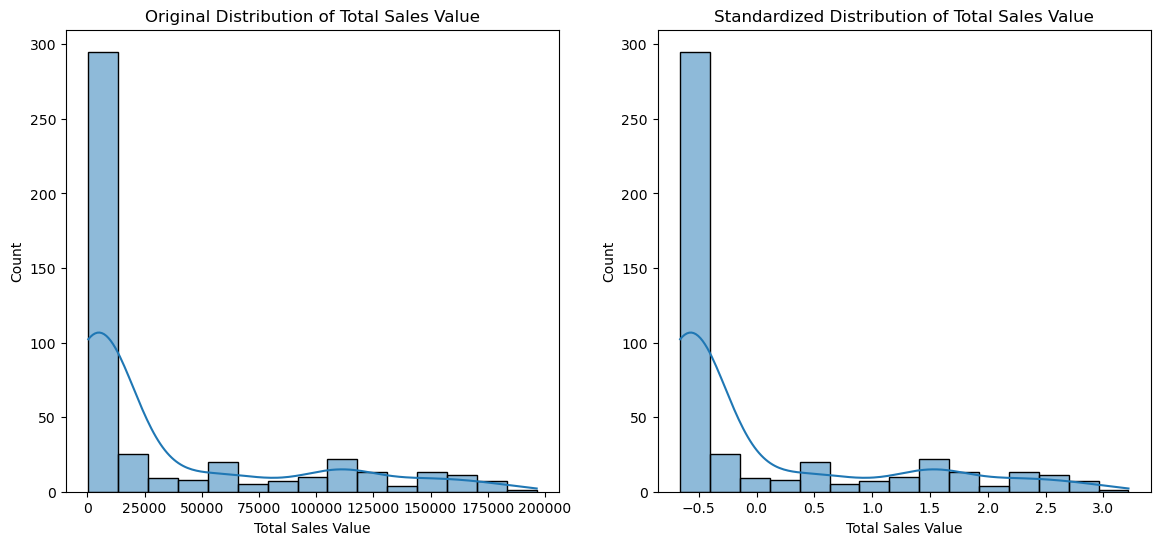

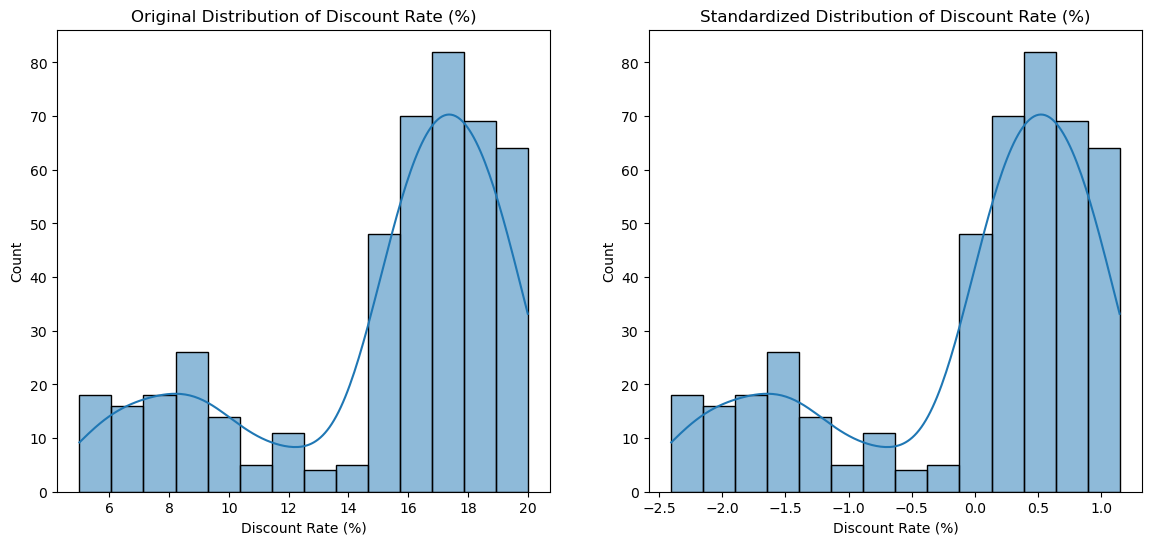

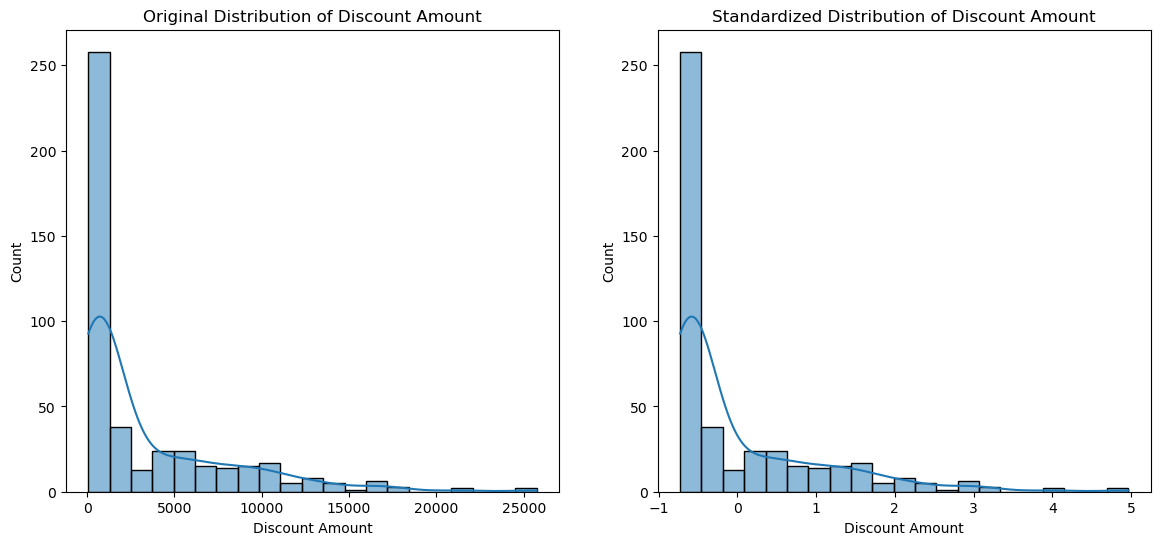

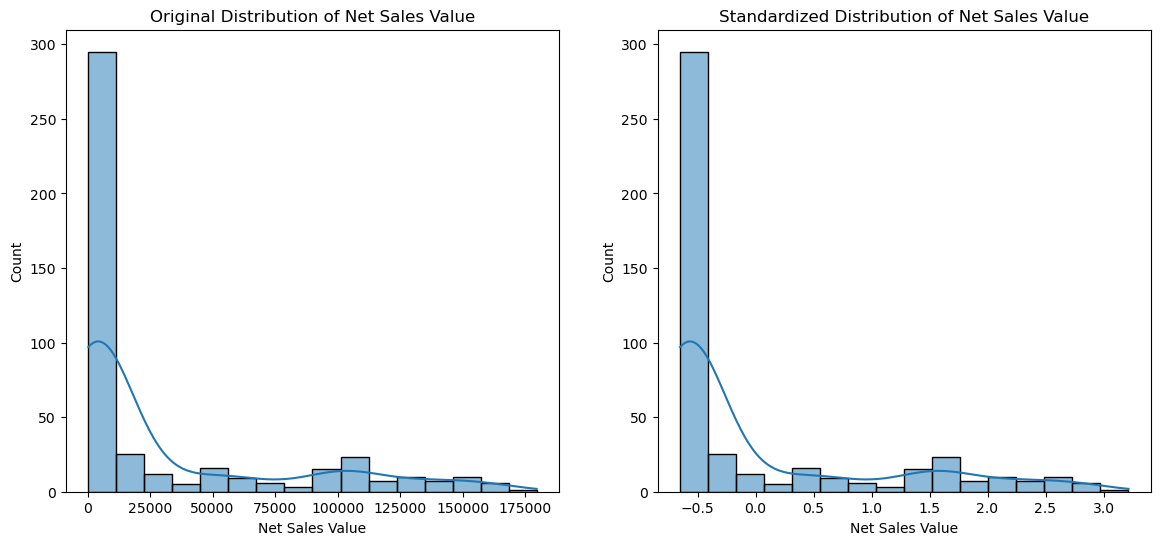

In [10]:
# Standardization of Numerical Variables
standardized_df = df.copy()
for col in numerical_columns:
    standardized_df[col] = (df[col] - df[col].mean()) / df[col].std()

# Show before and after comparisons of data distributions
for col in numerical_columns:
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Original Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.histplot(standardized_df[col], kde=True)
    plt.title(f'Standardized Distribution of {col}')

    plt.show()

In [11]:
# Conversion of Categorical Data into Dummy Variables
encoded_df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display a portion of the transformed dataset
encoded_df

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,6,2600,15600,17.057027,2660.896242,12939.103758,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,3,1900,5700,16.793014,957.201826,4742.798174,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Conclusion
conclusion = """
Summary of Key Findings:
- Descriptive statistics provided an overview of central tendency and variability in numerical columns.
- Histograms and boxplots revealed the distribution patterns, skewness, and presence of outliers in numerical data.
- Bar charts displayed the frequency distribution of categorical variables.
- Standardization helped in scaling numerical data for better comparability.
- One-hot encoding transformed categorical variables into a suitable format for machine learning models.

Data preprocessing steps like standardization and one-hot encoding are crucial for preparing datasets for further analysis and machine learning.
"""

print(conclusion)


Summary of Key Findings:
- Descriptive statistics provided an overview of central tendency and variability in numerical columns.
- Histograms and boxplots revealed the distribution patterns, skewness, and presence of outliers in numerical data.
- Bar charts displayed the frequency distribution of categorical variables.
- Standardization helped in scaling numerical data for better comparability.
- One-hot encoding transformed categorical variables into a suitable format for machine learning models.

Data preprocessing steps like standardization and one-hot encoding are crucial for preparing datasets for further analysis and machine learning.

